In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#import data
raw_df=pd.read_csv('datasets/Hormonal Cycle Wellness Research.csv')
raw_df.head(2)

,Timestamp,Sex,Mens_tracking,emo_tracking,phase_awareness,condition,condition_name,cycle_length,menstrual_symptoms,ovulation_symptoms,mood1,mood2,mood3,mood4,weeks_from_period,mood_this_week,productivity_rating,workout_hours,nutritional_tracking,self_care
0,2025/10/01 10:27:58 AM GMT+3,Female,"Yes, but inconsistently",Sometimes,No,No,NaN,26,Abdominal cramps;Fatigue;Nausea;Cravings;Heada...,Abdominal cramps;Increased sex drive,3,5,8,2,2,Calm,5,5–7 hours,workout_hours,"Meditation, yoga, swimming, gym"
1,2025/10/01 10:40:33 AM GMT+3,Female,"Yes, but inconsistently",Yes,Yes,No,NaN,30 days,Abdominal cramps;Fatigue;Nausea;Headaches;Bloa...,Abdominal cramps,2,7,9,8,0 (This is the week),Sad,8,Less than 2 hours,No,Art


In [ ]:
#selecting necessary columns
raw_df=raw_df.loc[:,['condition_name','cycle_length','menstrual_symptoms', 'ovulation_symptoms', 'mood1', 'mood2', 'mood3','mood4']]
raw_df.columns

Index(['condition_name', 'cycle_length', 'menstrual_symptoms',
       'ovulation_symptoms', 'mood1', 'mood2', 'mood3', 'mood4'],
      dtype='object')

In [13]:
#check for nulls
raw_df.isna().sum()

condition_name        25
cycle_length           0
menstrual_symptoms     0
ovulation_symptoms     0
mood1                  0
mood2                  0
mood3                  0
mood4                  0
dtype: int64

In [ ]:
#number of rows and columns
raw_df.shape

(27, 8)

## Cleaning the data


In [14]:
#no homornal condition
raw_df.condition_name.fillna("None", inplace=True)
raw_df.condition_name.head()

C:\Users\musom\AppData\Local\Temp\ipykernel_2604\1205780476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_df.condition_name.fillna("None", inplace=True)


0    None
1    None
2    None
3    None
4    None
Name: condition_name, dtype: object

In [ ]:
#cleaning cycle length
import re
def clean_days(day_string: str) -> float:
    days=re.findall(r'\d+',day_string)   #find all the specified dates e.g., from 28 to 30 = [28,30]
    days=list(map(float, days))
    avg_days=np.average(days)   #calculate the average of the days
    return avg_days


raw_df.cycle_length=raw_df.cycle_length.apply(clean_days)

c:\Users\musom\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\musom\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [16]:
raw_df['menstrual_symptoms']=raw_df['menstrual_symptoms'].apply(lambda x:x.split(';'))
raw_df['ovulation_symptoms']=raw_df['ovulation_symptoms'].apply(lambda x:x.split(';'))

In [17]:
raw_df.columns

Index(['condition_name', 'cycle_length', 'menstrual_symptoms',
       'ovulation_symptoms', 'mood1', 'mood2', 'mood3', 'mood4'],
      dtype='object')

In [18]:
import pandas as pd
df=pd.DataFrame(raw_df)
raw_df.to_excel('clean_data.xlsx', index=False)

## Visualizing the data

Text(0.5, 1.0, 'Distribution of Cycle Lengths')

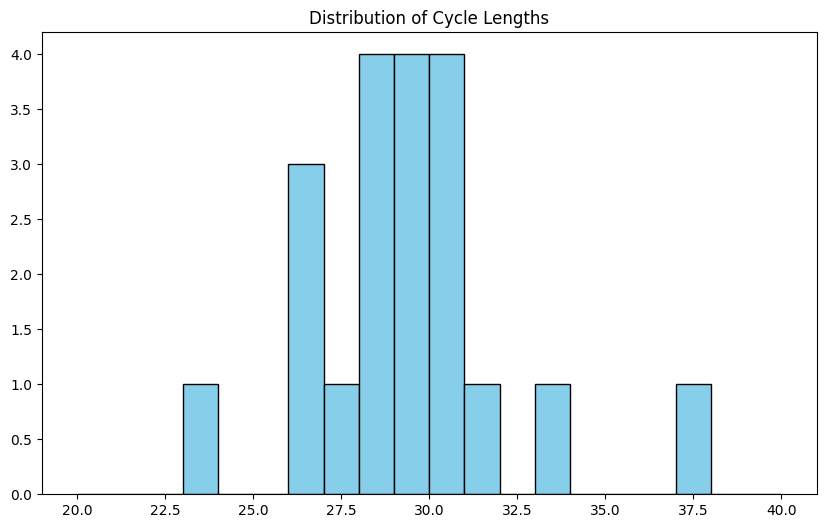

In [19]:
import matplotlib.pyplot as plt

#Plotting the distribution of cycle lengths
plt.figure(figsize=(10, 6))
plt.hist(raw_df['cycle_length'], bins=range(20, 41), color='skyblue', edgecolor='black')
plt.title('Distribution of Cycle Lengths')

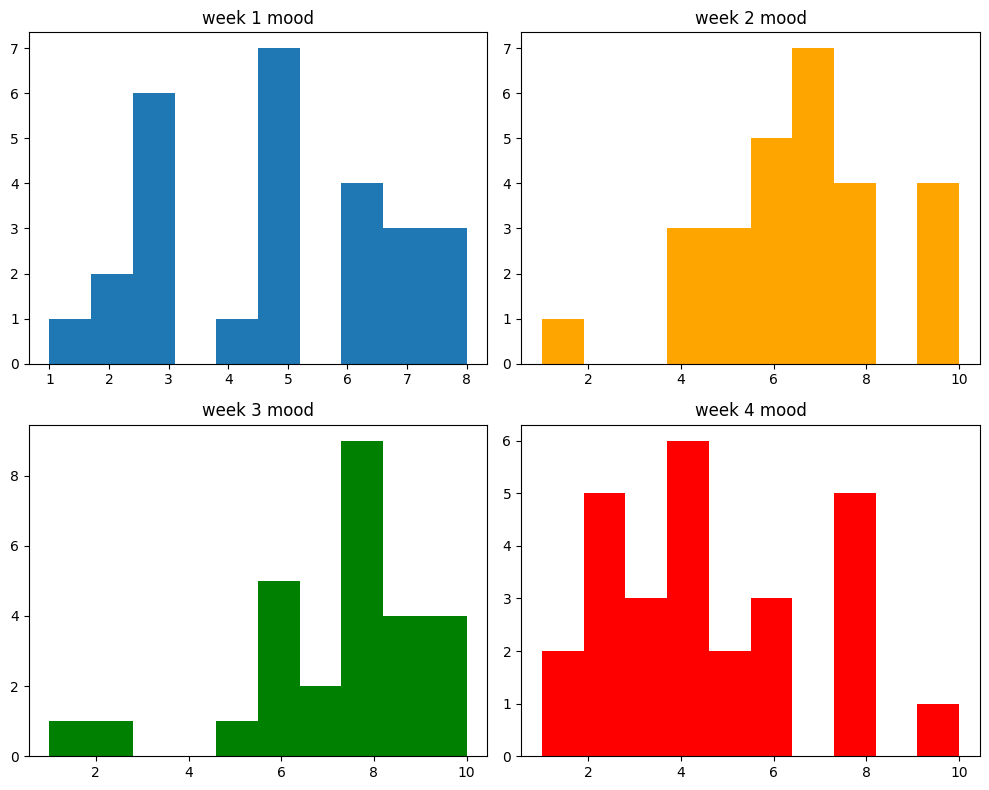

In [20]:
#plotting mood in the 4 phases
#grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#histograms
axes[0, 0].hist(raw_df['mood1'], bins=10)
axes[0, 0].set_title('week 1 mood')

axes[0, 1].hist(raw_df['mood2'], bins=10, color='orange')
axes[0, 1].set_title('week 2 mood')

axes[1, 0].hist(raw_df['mood3'], bins=10, color='green')
axes[1, 0].set_title('week 3 mood')

axes[1, 1].hist(raw_df['mood4'], bins=10, color='red')
axes[1, 1].set_title('week 4 mood')

plt.tight_layout()
plt.show()